In [1]:
import matplotlib.pyplot as plt
from matplotlib import patches
import random
import math


In [2]:
with open('../../../data/event000000000-spacepoint.csv', 'r', encoding='utf8') as file:
    lines = file.readlines()

for line in lines[:5]:
    print(line, end='')

measurement_id,geometry_id,x,y,z,var_r,var_z
0,1152921779484760320,156.76506,-5.30625391,-1523.19995,0.000899999985,8.43614858e-37
1,1152921779484760576,153.652435,25.7113953,-1524.40002,0.000899999985,8.43614858e-37
2,1152921779484760576,154.974457,28.9229641,-1524.40002,0.000899999985,8.43614858e-37
3,1152921779484760832,-15.4573355,157.548386,-1523.19995,0.000899999985,8.43614858e-37


In [3]:
points = []
for line in lines[1:]:
    point_variables = line.strip().split(',')
    point = {
        'x': float(point_variables[2]),
        'y': float(point_variables[3]),
        'z': float(point_variables[4]),
    }
    points.append(point)

print(points[0])

{'x': 156.76506, 'y': -5.30625391, 'z': -1523.19995}


In [4]:
def get_3d_plot_figure(figure_size):
    figure = plt.figure(figsize=figure_size)
    ax = plt.axes(projection='3d')
    ax.set_xlim([-1000, 1000])
    ax.set_ylim([-3000, 3000])
    ax.set_zlim([-1000, 1000])
    ax.set_xlabel('x')
    ax.set_ylabel('z')
    ax.set_zlabel('y')

    ax.set_facecolor('black')
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.tick_params(colors='white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.zaxis.label.set_color('white')
    return figure, ax

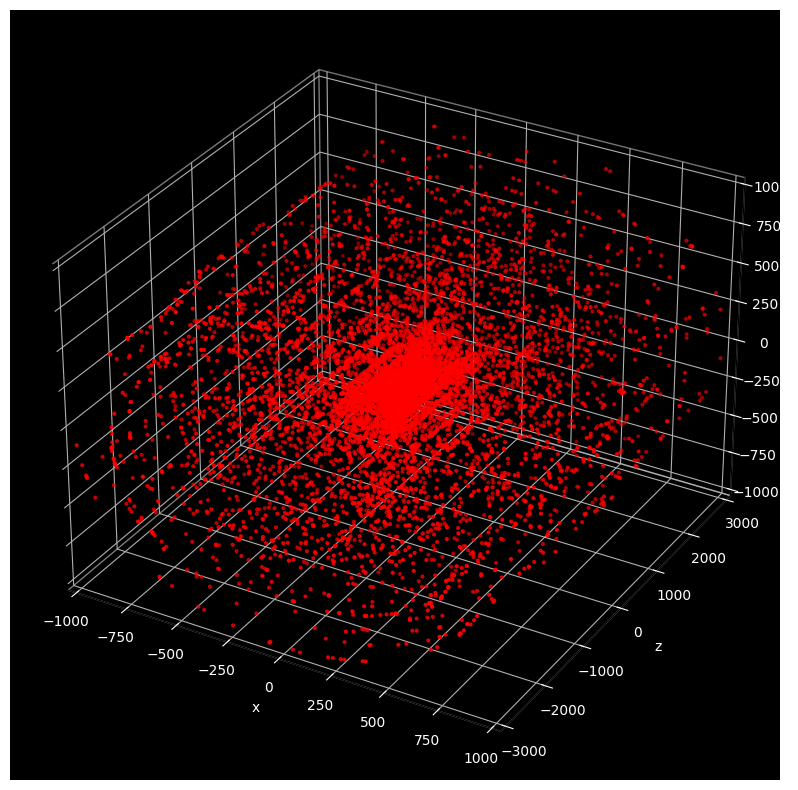

In [5]:
def plot_points(points, n, figure_size=(10, 10), point_size=4):
    figure, ax = get_3d_plot_figure(figure_size=figure_size)

    points_to_plot = random.sample(points, n)
    points_x = [point['x'] for point in points_to_plot]
    points_y = [point['y'] for point in points_to_plot]
    points_z = [point['z'] for point in points_to_plot]
    ax.scatter3D(points_x, points_z, points_y, color='red', s=point_size)

plot_points(points, 10000)

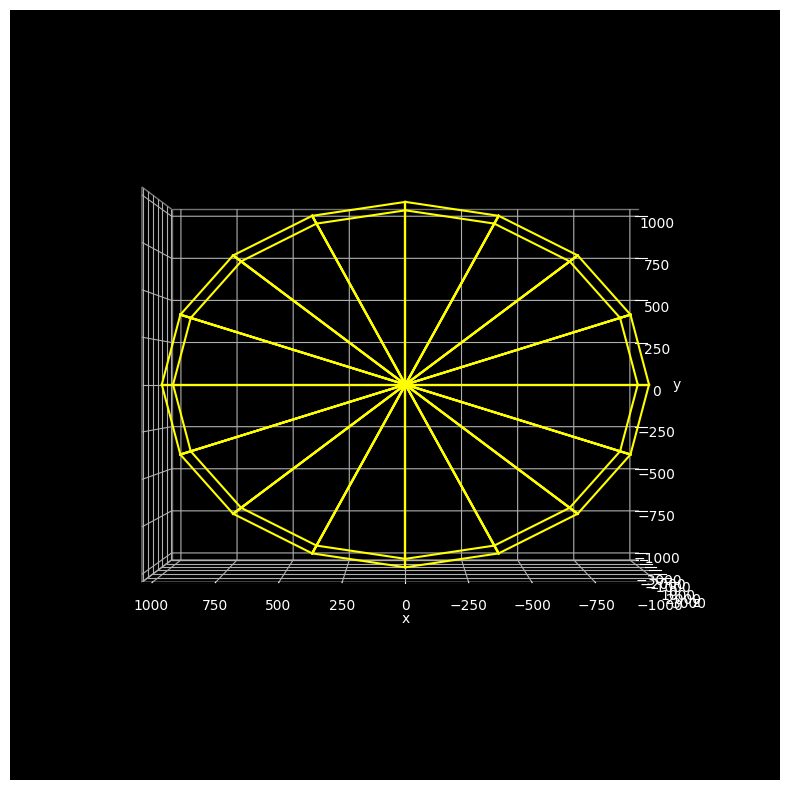

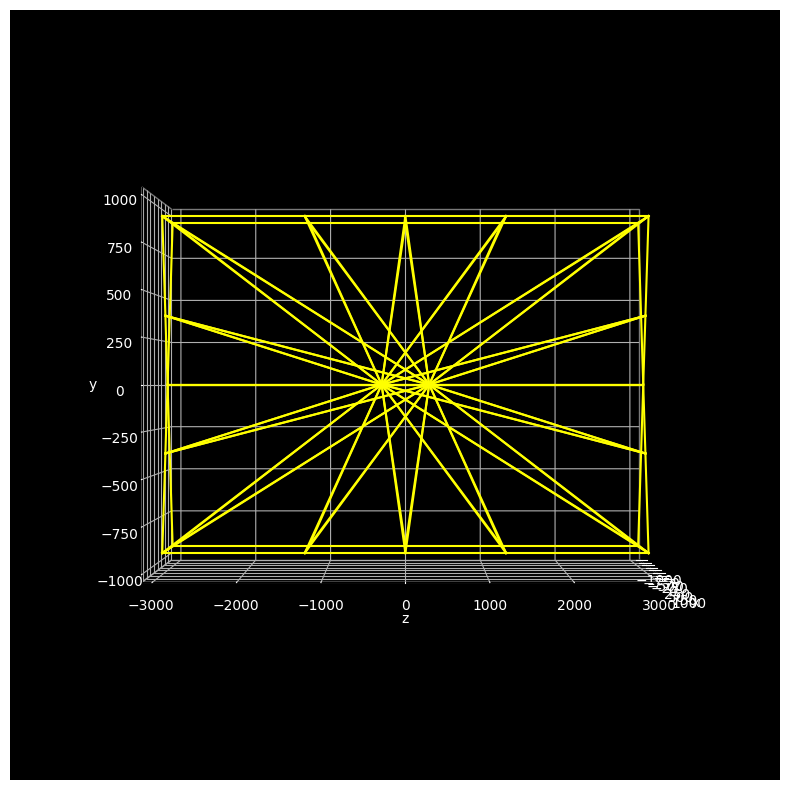

In [6]:
class Wedge:
    def __init__(self, z_angle_min, z_angle_max, x_angle_min, x_angle_max, interaction_region_width):
        self.z_angle_min = z_angle_min
        self.z_angle_max = z_angle_max
        self.x_angle_min = x_angle_min
        self.x_angle_max = x_angle_max
        self.interaction_region_width = interaction_region_width

    def get_outermost_points(self):
        def angles_to_xyz(z_angle, x_angle):
            ray_x = math.cos(x_angle)
            ray_y = math.sin(x_angle)

            ray_scale = 1 / max(abs(ray_x), abs(ray_y))
            ray_x *= ray_scale
            ray_y *= ray_scale

            return {
                'x': ray_y * math.cos(z_angle),
                'y': ray_y * math.sin(z_angle),
                'z': ray_x
            }

        return {
            'z_angle_min_x_angle_min': angles_to_xyz(self.z_angle_min, self.x_angle_min),
            'z_angle_min_x_angle_max': angles_to_xyz(self.z_angle_min, self.x_angle_max),
            'z_angle_max_x_angle_min': angles_to_xyz(self.z_angle_max, self.x_angle_min),
            'z_angle_max_x_angle_max': angles_to_xyz(self.z_angle_max, self.x_angle_max)
        }
    
    def get_interaction_region_points(self):
        return {
            'x_angle_min': self.interaction_region_width / 2,
            'x_angle_max': -self.interaction_region_width / 2,
        }

def plot_wedge_lines(figure, ax, wedge, color='yellow'):
    outermost_points = wedge.get_outermost_points()
    interaction_region_points = wedge.get_interaction_region_points()

    xs = []
    xs.append([0, outermost_points['z_angle_min_x_angle_min']['x']])
    xs.append([0, outermost_points['z_angle_min_x_angle_max']['x']])
    xs.append([0, outermost_points['z_angle_max_x_angle_min']['x']])
    xs.append([0, outermost_points['z_angle_max_x_angle_max']['x']])
    xs.append([outermost_points['z_angle_min_x_angle_min']['x'], outermost_points['z_angle_min_x_angle_max']['x']])
    xs.append([outermost_points['z_angle_max_x_angle_min']['x'], outermost_points['z_angle_max_x_angle_max']['x']])
    xs.append([outermost_points['z_angle_min_x_angle_min']['x'], outermost_points['z_angle_max_x_angle_min']['x']])
    xs.append([outermost_points['z_angle_min_x_angle_max']['x'], outermost_points['z_angle_max_x_angle_max']['x']])

    ys = []
    ys.append([0, outermost_points['z_angle_min_x_angle_min']['y']])
    ys.append([0, outermost_points['z_angle_min_x_angle_max']['y']])
    ys.append([0, outermost_points['z_angle_max_x_angle_min']['y']])
    ys.append([0, outermost_points['z_angle_max_x_angle_max']['y']])
    ys.append([outermost_points['z_angle_min_x_angle_min']['y'], outermost_points['z_angle_min_x_angle_max']['y']])
    ys.append([outermost_points['z_angle_max_x_angle_min']['y'], outermost_points['z_angle_max_x_angle_max']['y']])
    ys.append([outermost_points['z_angle_min_x_angle_min']['y'], outermost_points['z_angle_max_x_angle_min']['y']])
    ys.append([outermost_points['z_angle_min_x_angle_max']['y'], outermost_points['z_angle_max_x_angle_max']['y']])

    zs = []
    zs.append([interaction_region_points['x_angle_min'], outermost_points['z_angle_min_x_angle_min']['z']])
    zs.append([interaction_region_points['x_angle_max'], outermost_points['z_angle_min_x_angle_max']['z']])
    zs.append([interaction_region_points['x_angle_min'], outermost_points['z_angle_max_x_angle_min']['z']])
    zs.append([interaction_region_points['x_angle_max'], outermost_points['z_angle_max_x_angle_max']['z']])
    zs.append([outermost_points['z_angle_min_x_angle_min']['z'], outermost_points['z_angle_min_x_angle_max']['z']])
    zs.append([outermost_points['z_angle_max_x_angle_min']['z'], outermost_points['z_angle_max_x_angle_max']['z']])
    zs.append([outermost_points['z_angle_min_x_angle_min']['z'], outermost_points['z_angle_max_x_angle_min']['z']])
    zs.append([outermost_points['z_angle_min_x_angle_max']['z'], outermost_points['z_angle_max_x_angle_max']['z']])

    xs = [[i[0] * 1000, i[1] * 1000] for i in xs]
    ys = [[i[0] * 1000, i[1] * 1000] for i in ys]
    zs = [[i[0] * 3000, i[1] * 3000] for i in zs]

    for i in range(len(xs)):
        ax.plot(xs[i], zs[i], ys[i], color=color)


wedges = [Wedge(i * 1 / 8 * math.pi, (i + 1) * 1 / 8 * math.pi, 3 * 1 / 8 * math.pi, 5 * 1 / 8 * math.pi, 0.2) for i in range(16)]
figure, ax = get_3d_plot_figure(figure_size=(10, 10))
ax.view_init(elev=0, azim=90, roll=0)
for wedge in wedges:
    plot_wedge_lines(figure, ax, wedge)

wedges = [Wedge(3 * 1 / 8 * math.pi, 5 * 1 / 8 * math.pi, i * 1 / 8 * math.pi, (i + 1) * 1 / 8 * math.pi, 0.2) for i in range(16)]
figure, ax = get_3d_plot_figure(figure_size=(10, 10))
ax.view_init(elev=0, azim=0, roll=0)
for wedge in wedges:
    plot_wedge_lines(figure, ax, wedge)


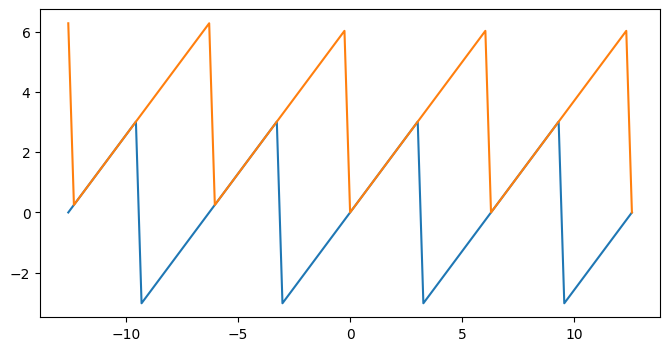

In [7]:
def angle_wrap(angle):
    return math.fmod(angle + math.pi, 2 * math.pi) + (-1 + 2 * (1 if angle + math.pi < 0 else 0)) * math.pi

def angle_wrap_2pi(angle):
    return math.fmod(angle, 2 * math.pi) if angle >= 0 else (2 * math.pi + math.fmod(angle, 2 * math.pi))

def uniform_range(min, max, num_points):
    return [min + i * (max - min) / (num_points - 1) for i in range(num_points)]

figure_size = (8, 4)
figure = plt.figure(figsize=figure_size)
ax = figure.gca()
test_range = uniform_range(-4 * math.pi, 4 * math.pi, 101)
ax.plot(test_range, [angle_wrap(i) for i in test_range])
ax.plot(test_range, [angle_wrap_2pi(i) for i in test_range])

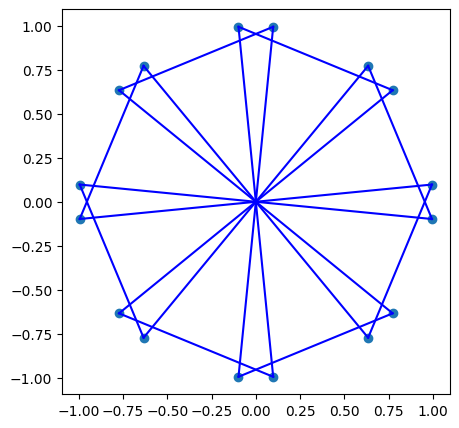

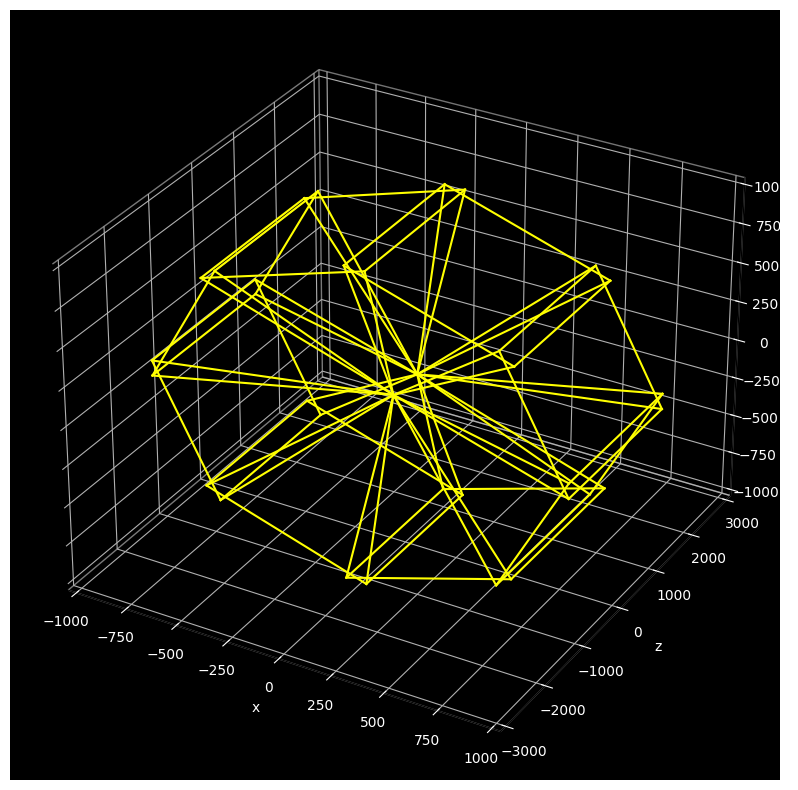

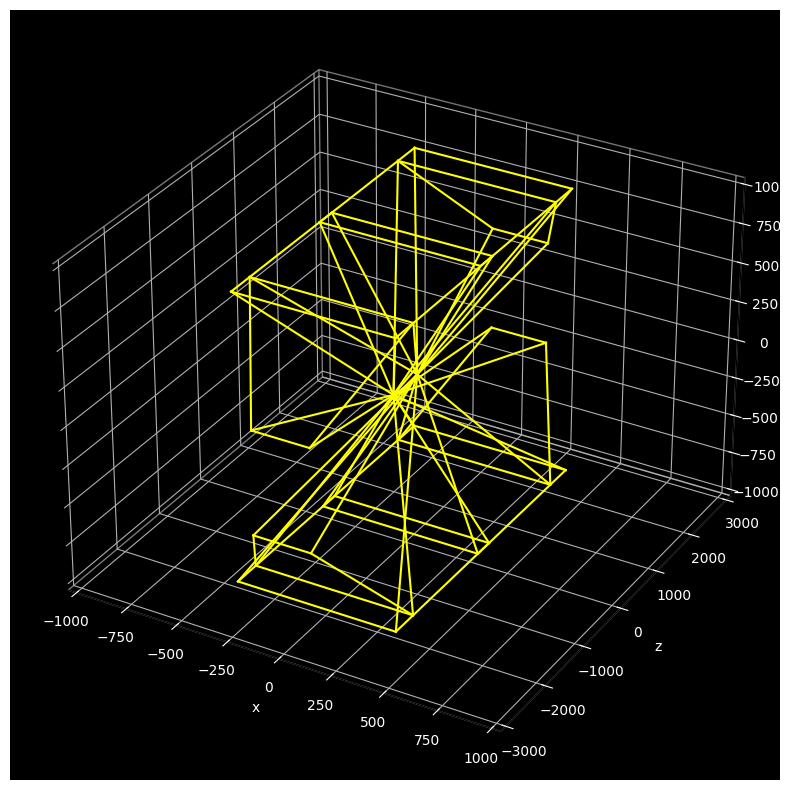

In [8]:
def uniform_range_split(num_ranges, min_range, max_range, angle_margin):
    boundaries = uniform_range(min_range, max_range, num_ranges + 1)
    return [(boundaries[i] - angle_margin, boundaries[i + 1] + angle_margin) for i in range(num_ranges)]

figure_size = (5, 5)
figure = plt.figure(figsize=figure_size)
ax = figure.gca()

ranges = uniform_range_split(8, 0, 2 * math.pi, 2 * math.pi / 64)

outermost_points = []
for (range_min, range_max) in ranges:
    range_min_x = math.cos(range_min) 
    range_min_y = math.sin(range_min)
    range_max_x = math.cos(range_max)
    range_max_y = math.sin(range_max)
    outermost_points.append((range_min_x, range_min_y))
    outermost_points.append((range_max_x, range_max_y))
    plt.plot([0, range_min_x], [0, range_min_y], c='blue')
    plt.plot([0, range_max_x], [0, range_max_y], c='blue')
    plt.plot([range_min_x, range_max_x], [range_min_y, range_max_y], c='blue')
plt.scatter([i[0] for i in outermost_points], [i[1] for i in outermost_points])

z_ranges = uniform_range_split(8, 0, 2 * math.pi, 2 * math.pi / 128)
wedges = [Wedge(z_range[0], z_range[1], 3 * 1 / 8 * math.pi, 5 * 1 / 8 * math.pi, 0.2) for z_range in z_ranges]

figure, ax = get_3d_plot_figure(figure_size=(10, 10))
for wedge in wedges:
    plot_wedge_lines(figure, ax, wedge)

x_ranges = uniform_range_split(4, 8 / 64 * math.pi, 56 / 64 * math.pi, 2 * math.pi / 128)
x_ranges.extend(uniform_range_split(4, 72 / 64 * math.pi, 120 / 64 * math.pi, 2 * math.pi / 128))
wedges = [Wedge(3 * 1 / 8 * math.pi, 5 * 1 / 8 * math.pi, x_range[0], x_range[1], 0.2) for x_range in x_ranges]

figure, ax = get_3d_plot_figure(figure_size=(10, 10))
for wedge in wedges:
    plot_wedge_lines(figure, ax, wedge)

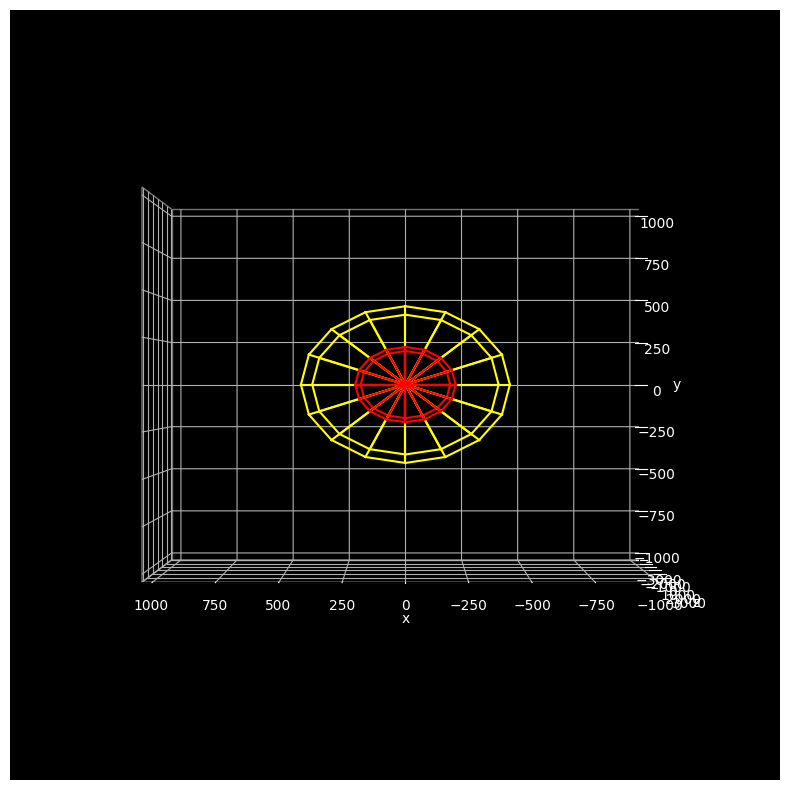

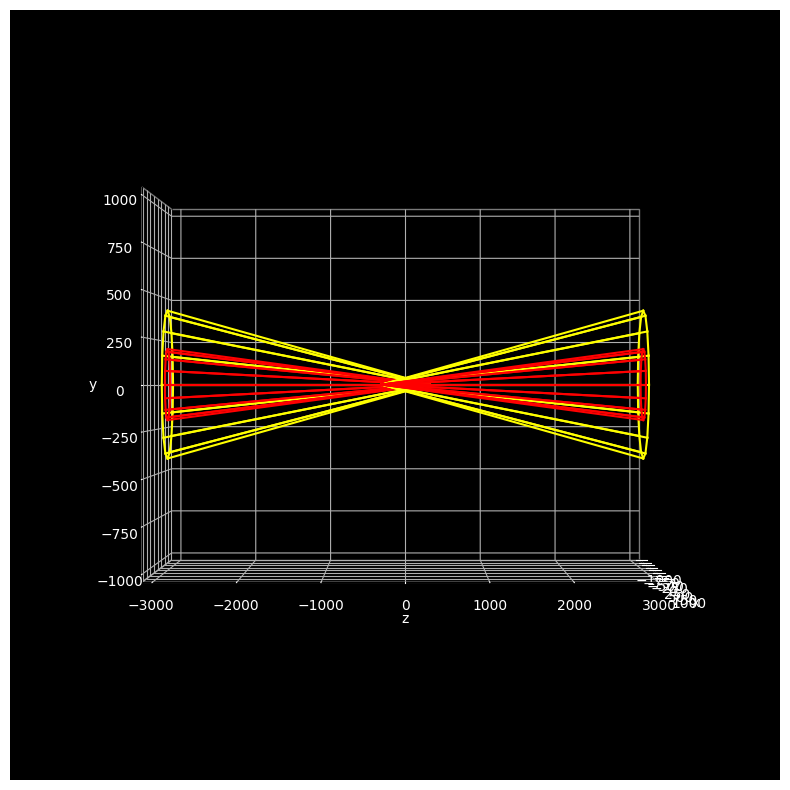

In [12]:
class PoleRegion:
    def __init__(self, x_angle, interaction_region_width):
        self.x_angle = x_angle
        self.interaction_region_width = interaction_region_width

    def get_outermost_points(self, num_points):
        ray_x = math.cos(self.x_angle)
        ray_y = math.sin(self.x_angle)

        ray_scale = 1 / abs(ray_x)
        ray_y *= ray_scale

        points = []
        for z_angle in [i / num_points * 2 * math.pi for i in range(num_points)]:
            points.append({
                'x': ray_y * math.cos(z_angle),
                'y': ray_y * math.sin(z_angle),
                'z': 1 if math.cos(self.x_angle) > 0 else -1
            })
        return points
    
    def get_interaction_region_point(self):
        return {
            'x': 0,
            'y': 0,
            'z': (1 if self.x_angle > math.pi / 2 else -1) * self.interaction_region_width / 2
        }

def plot_pole_region(figure, ax, region, num_rays=16, num_cone_lines=16, num_arc_lines=16, color='yellow'):
    outermost_points = region.get_outermost_points(num_rays)
    interaction_region_point = region.get_interaction_region_point()

    xs = []
    ys = []
    zs = []
    for point in outermost_points:
        xs.append([interaction_region_point['x'], point['x']])
        ys.append([interaction_region_point['y'], point['y']])
        zs.append([interaction_region_point['z'], point['z']])

    for i in range(len(outermost_points) - 1):
        xs.append([outermost_points[i]['x'], outermost_points[i + 1]['x']])
        ys.append([outermost_points[i]['y'], outermost_points[i + 1]['y']])
        zs.append([outermost_points[i]['z'], outermost_points[i + 1]['z']])

    xs.append([outermost_points[-1]['x'], outermost_points[0]['x']])
    ys.append([outermost_points[-1]['y'], outermost_points[0]['y']])
    zs.append([outermost_points[-1]['z'], outermost_points[0]['z']])

    xs = [[i[0] * 1000, i[1] * 1000] for i in xs]
    ys = [[i[0] * 1000, i[1] * 1000] for i in ys]
    zs = [[i[0] * 3000, i[1] * 3000] for i in zs]

    for i in range(len(xs)):
        ax.plot(xs[i], zs[i], ys[i], color=color)

pole_region = PoleRegion(56 / 64 * math.pi, 0.2)
pole_region2 = PoleRegion(60 / 64 * math.pi, 0.2)
pole_region3 = PoleRegion(8 / 64 * math.pi, 0.2)
pole_region4 = PoleRegion(4 / 64 * math.pi, 0.2)

figure, ax = get_3d_plot_figure(figure_size=(10, 10))
ax.view_init(elev=0, azim=90, roll=0)
num_rays = 16
plot_pole_region(figure, ax, pole_region, num_rays=num_rays)
plot_pole_region(figure, ax, pole_region2, num_rays=num_rays, color="red")
plot_pole_region(figure, ax, pole_region3, num_rays=num_rays)
plot_pole_region(figure, ax, pole_region4, num_rays=num_rays, color="red")

figure, ax = get_3d_plot_figure(figure_size=(10, 10))
ax.view_init(elev=0, azim=0, roll=0)
num_rays = 16
plot_pole_region(figure, ax, pole_region, num_rays=num_rays)
plot_pole_region(figure, ax, pole_region2, num_rays=num_rays, color="red")
plot_pole_region(figure, ax, pole_region3, num_rays=num_rays)
plot_pole_region(figure, ax, pole_region4, num_rays=num_rays, color="red")


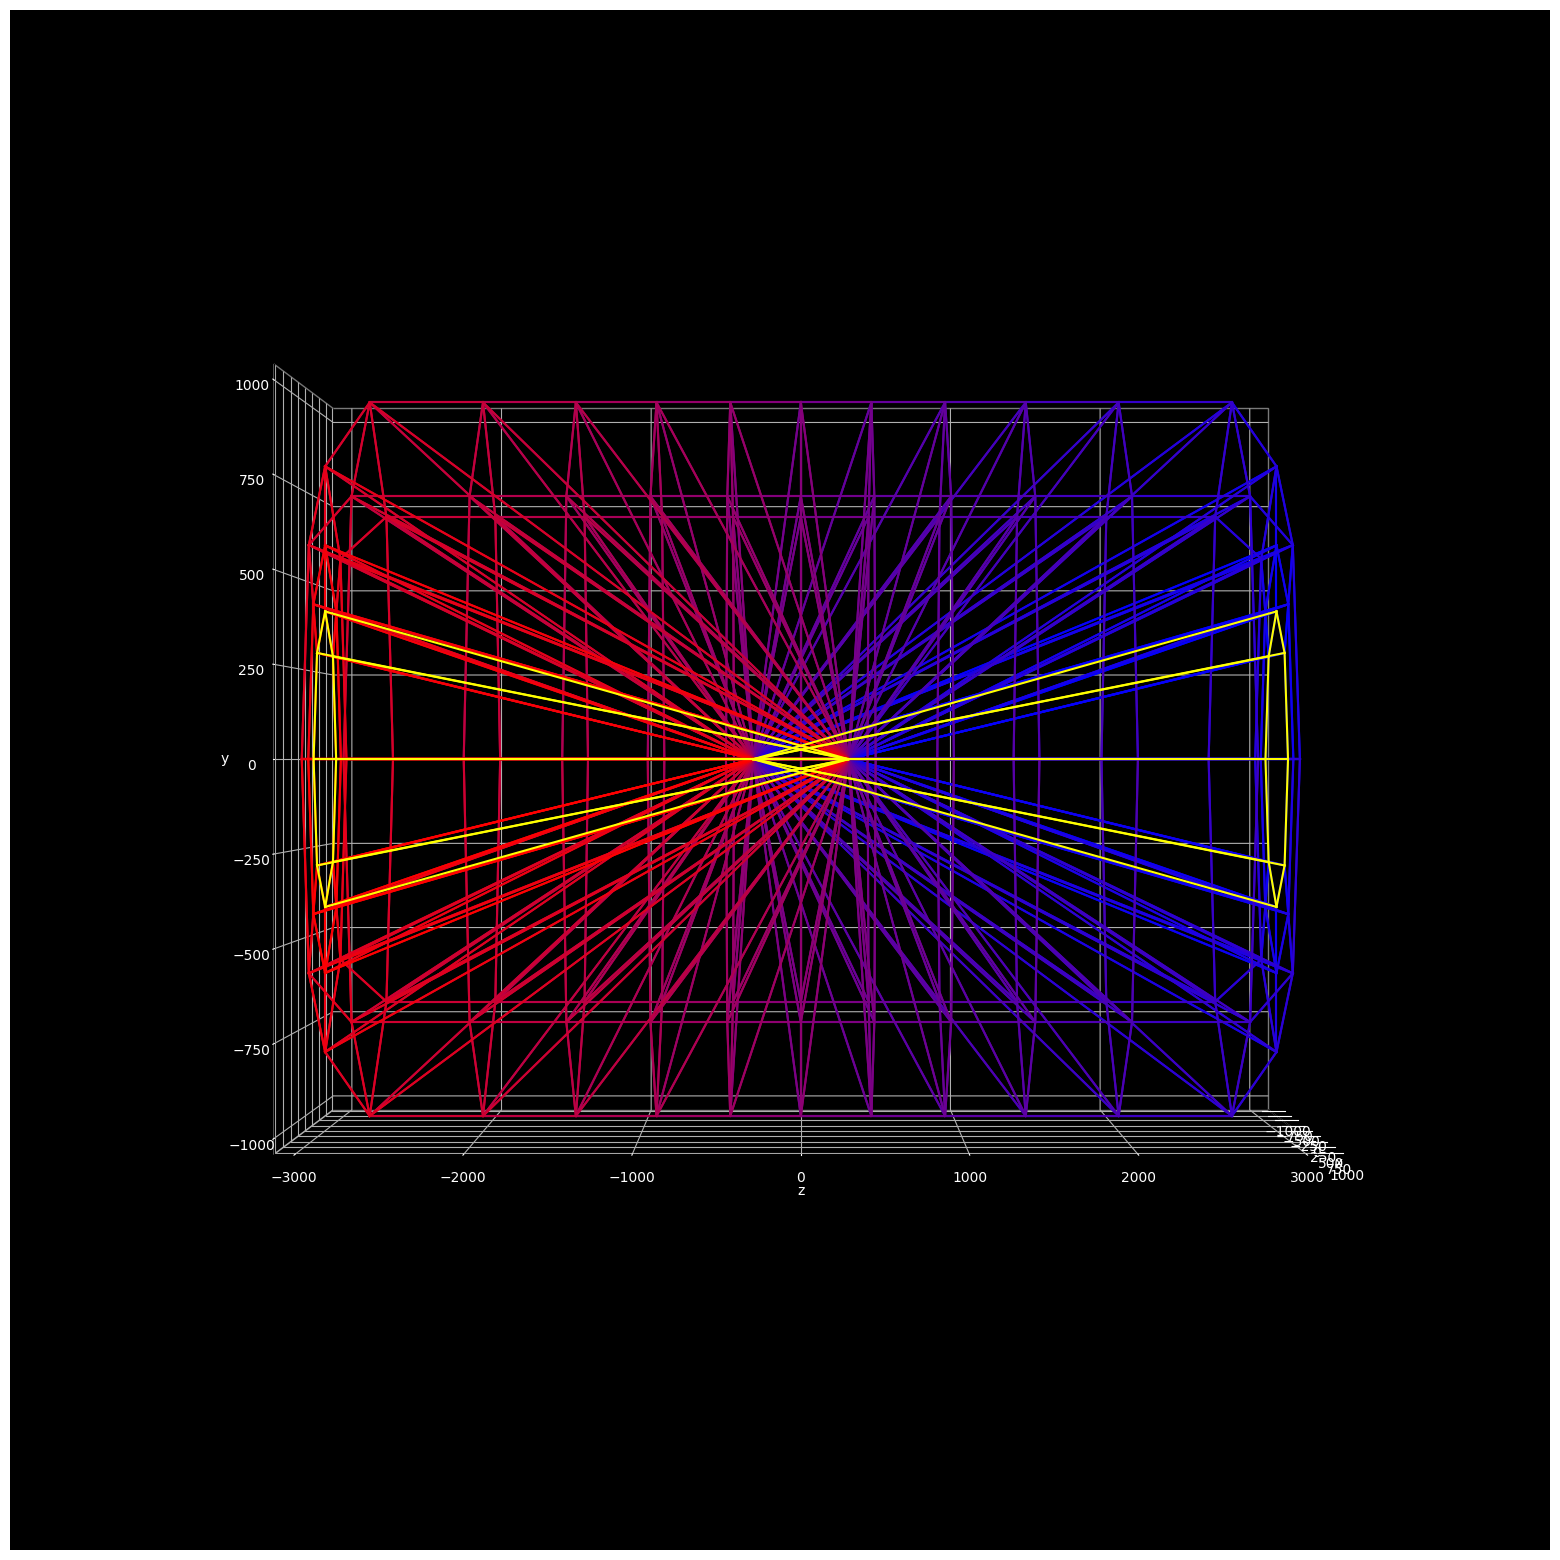

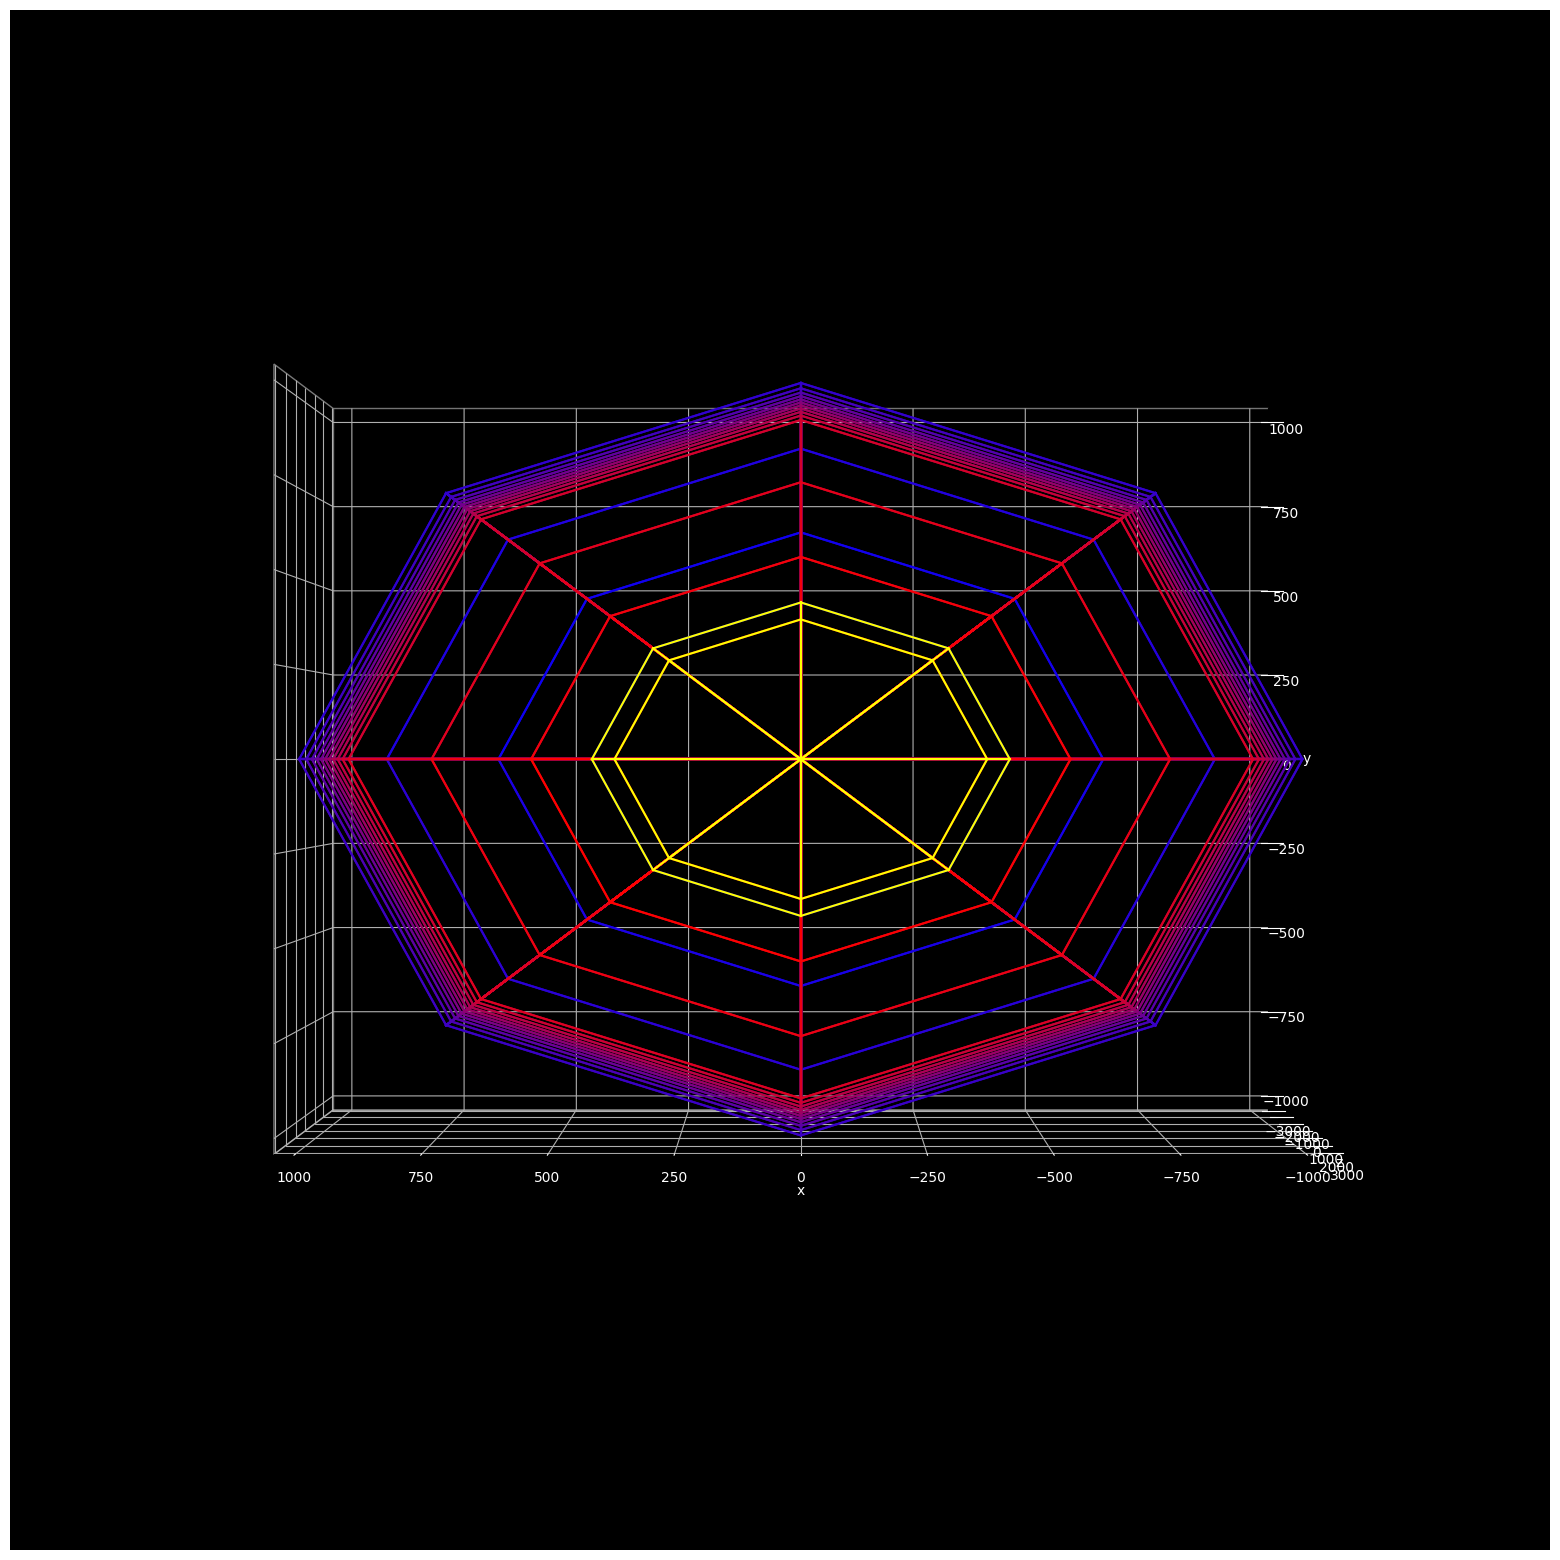

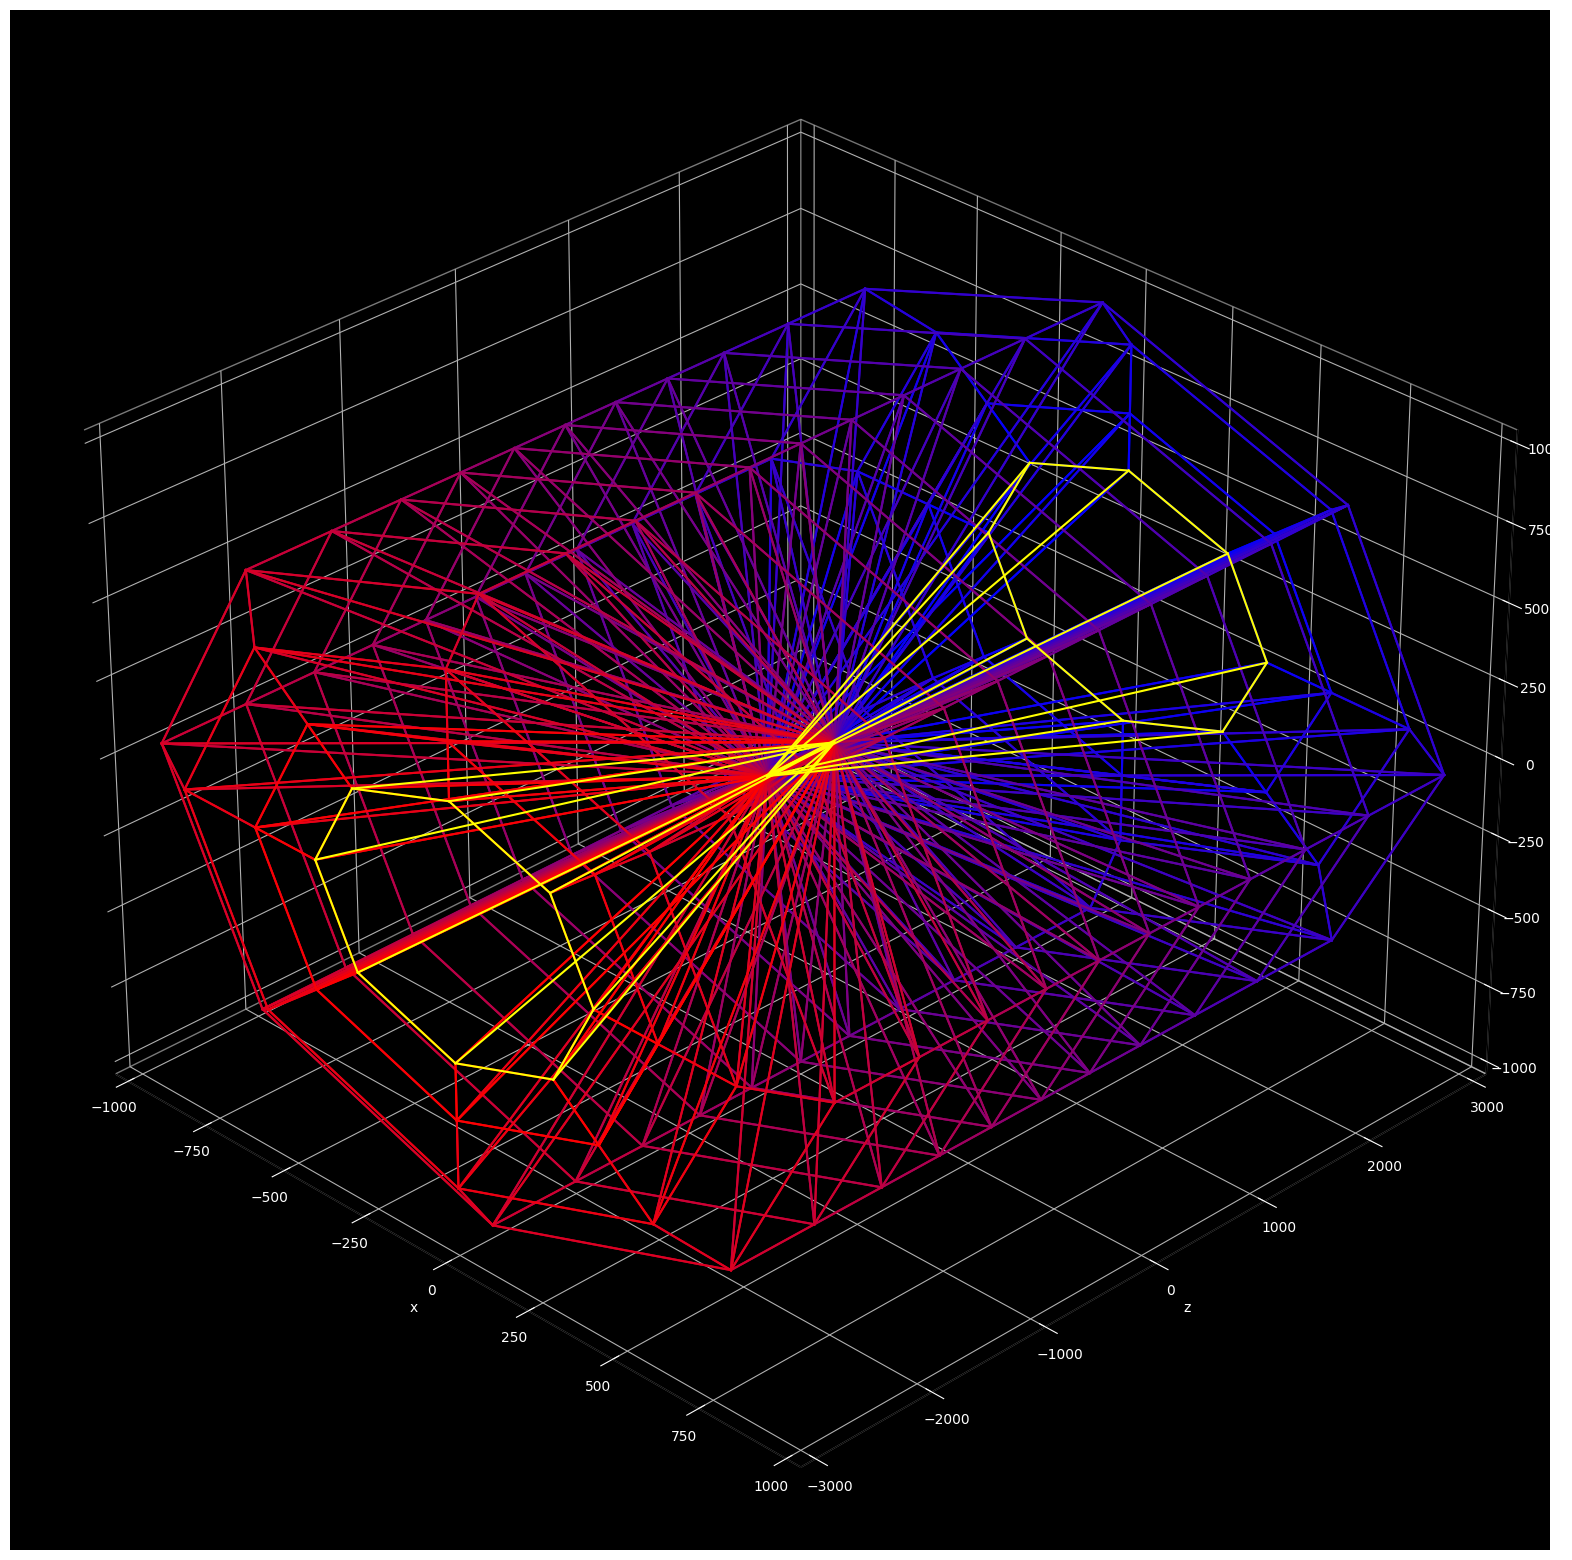

In [14]:
margin = 0
num_z_ranges = 8
num_x_ranges = 16
z_ranges = uniform_range_split(num_z_ranges, 0, 2 * math.pi, margin)
x_ranges = uniform_range_split(num_x_ranges, 8 / 64 * math.pi, 56 / 64 * math.pi, margin)


wedges = []
for x_range in x_ranges:
    for z_range in z_ranges:
        wedges.append(Wedge(z_range[0], z_range[1], x_range[0], x_range[1], 0.2))

pole_regions = []
pole_regions.append(PoleRegion(8 / 64 * math.pi, 0.2))
pole_regions.append(PoleRegion(56 / 64 * math.pi, 0.2))

figure, ax = get_3d_plot_figure(figure_size=(20, 20))
ax.view_init(elev=0, azim=0, roll=0)
for i in range(len(wedges)):
    red = (i / (len(wedges) - 1))
    blue = 1 - red
    plot_wedge_lines(figure, ax, wedges[i], color=(red, 0, blue))
for pole_region in pole_regions:
    plot_pole_region(figure, ax, pole_region, num_rays=num_z_ranges, color='yellow')

figure, ax = get_3d_plot_figure(figure_size=(20, 20))
ax.view_init(elev=0, azim=90, roll=0)
for i in range(len(wedges)):
    red = (i / (len(wedges) - 1))
    blue = 1 - red
    plot_wedge_lines(figure, ax, wedges[i], color=(red, 0, blue))
for pole_region in pole_regions:
    plot_pole_region(figure, ax, pole_region, num_rays=num_z_ranges, color='yellow')

figure, ax = get_3d_plot_figure(figure_size=(20, 20))
ax.view_init(elev=30, azim=-45, roll=0)
for i in range(len(wedges)):
    red = (i / (len(wedges) - 1))
    blue = 1 - red
    plot_wedge_lines(figure, ax, wedges[i], color=(red, 0, blue))
for pole_region in pole_regions:
    plot_pole_region(figure, ax, pole_region, num_rays=num_z_ranges, color='yellow')

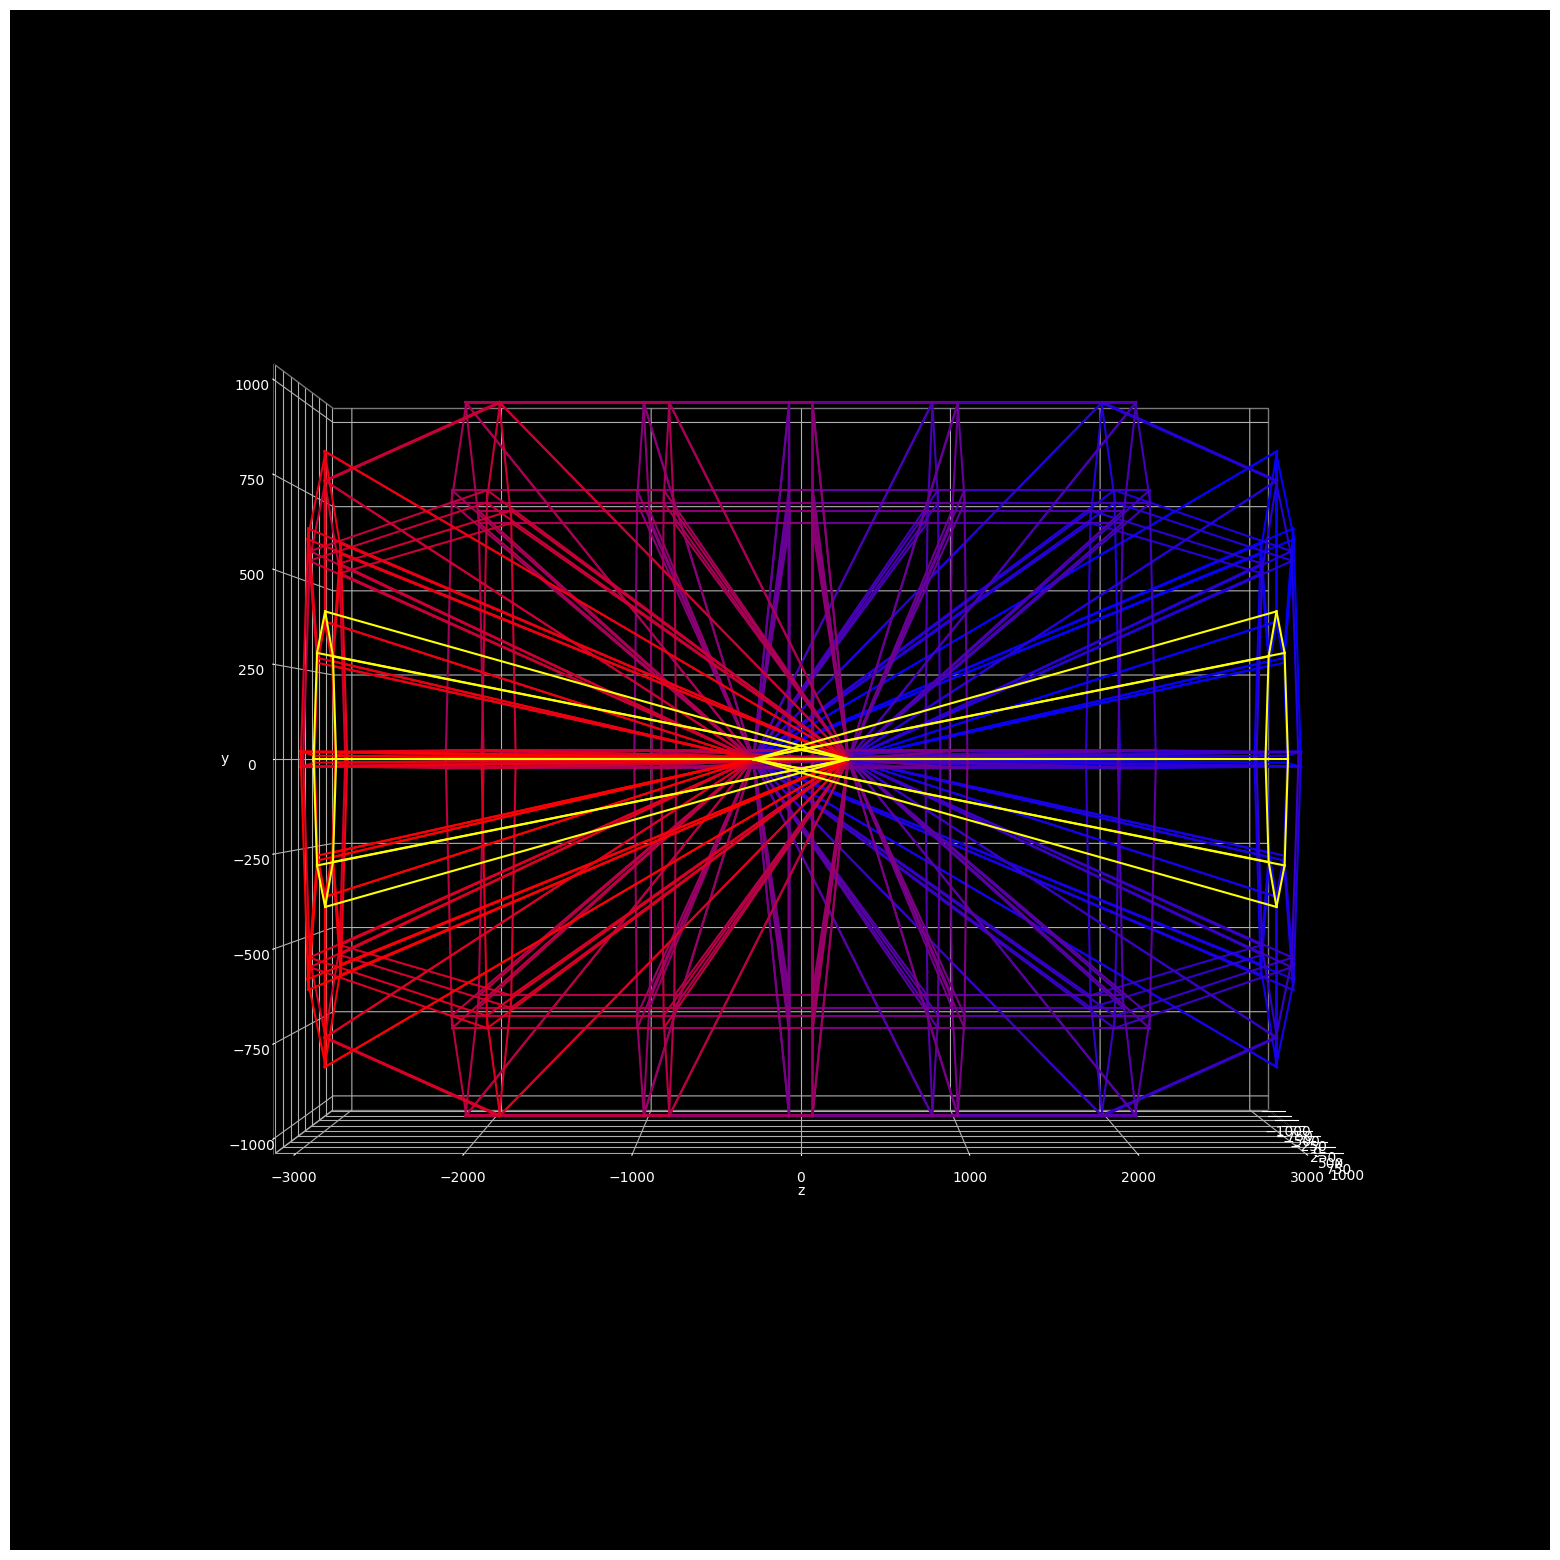

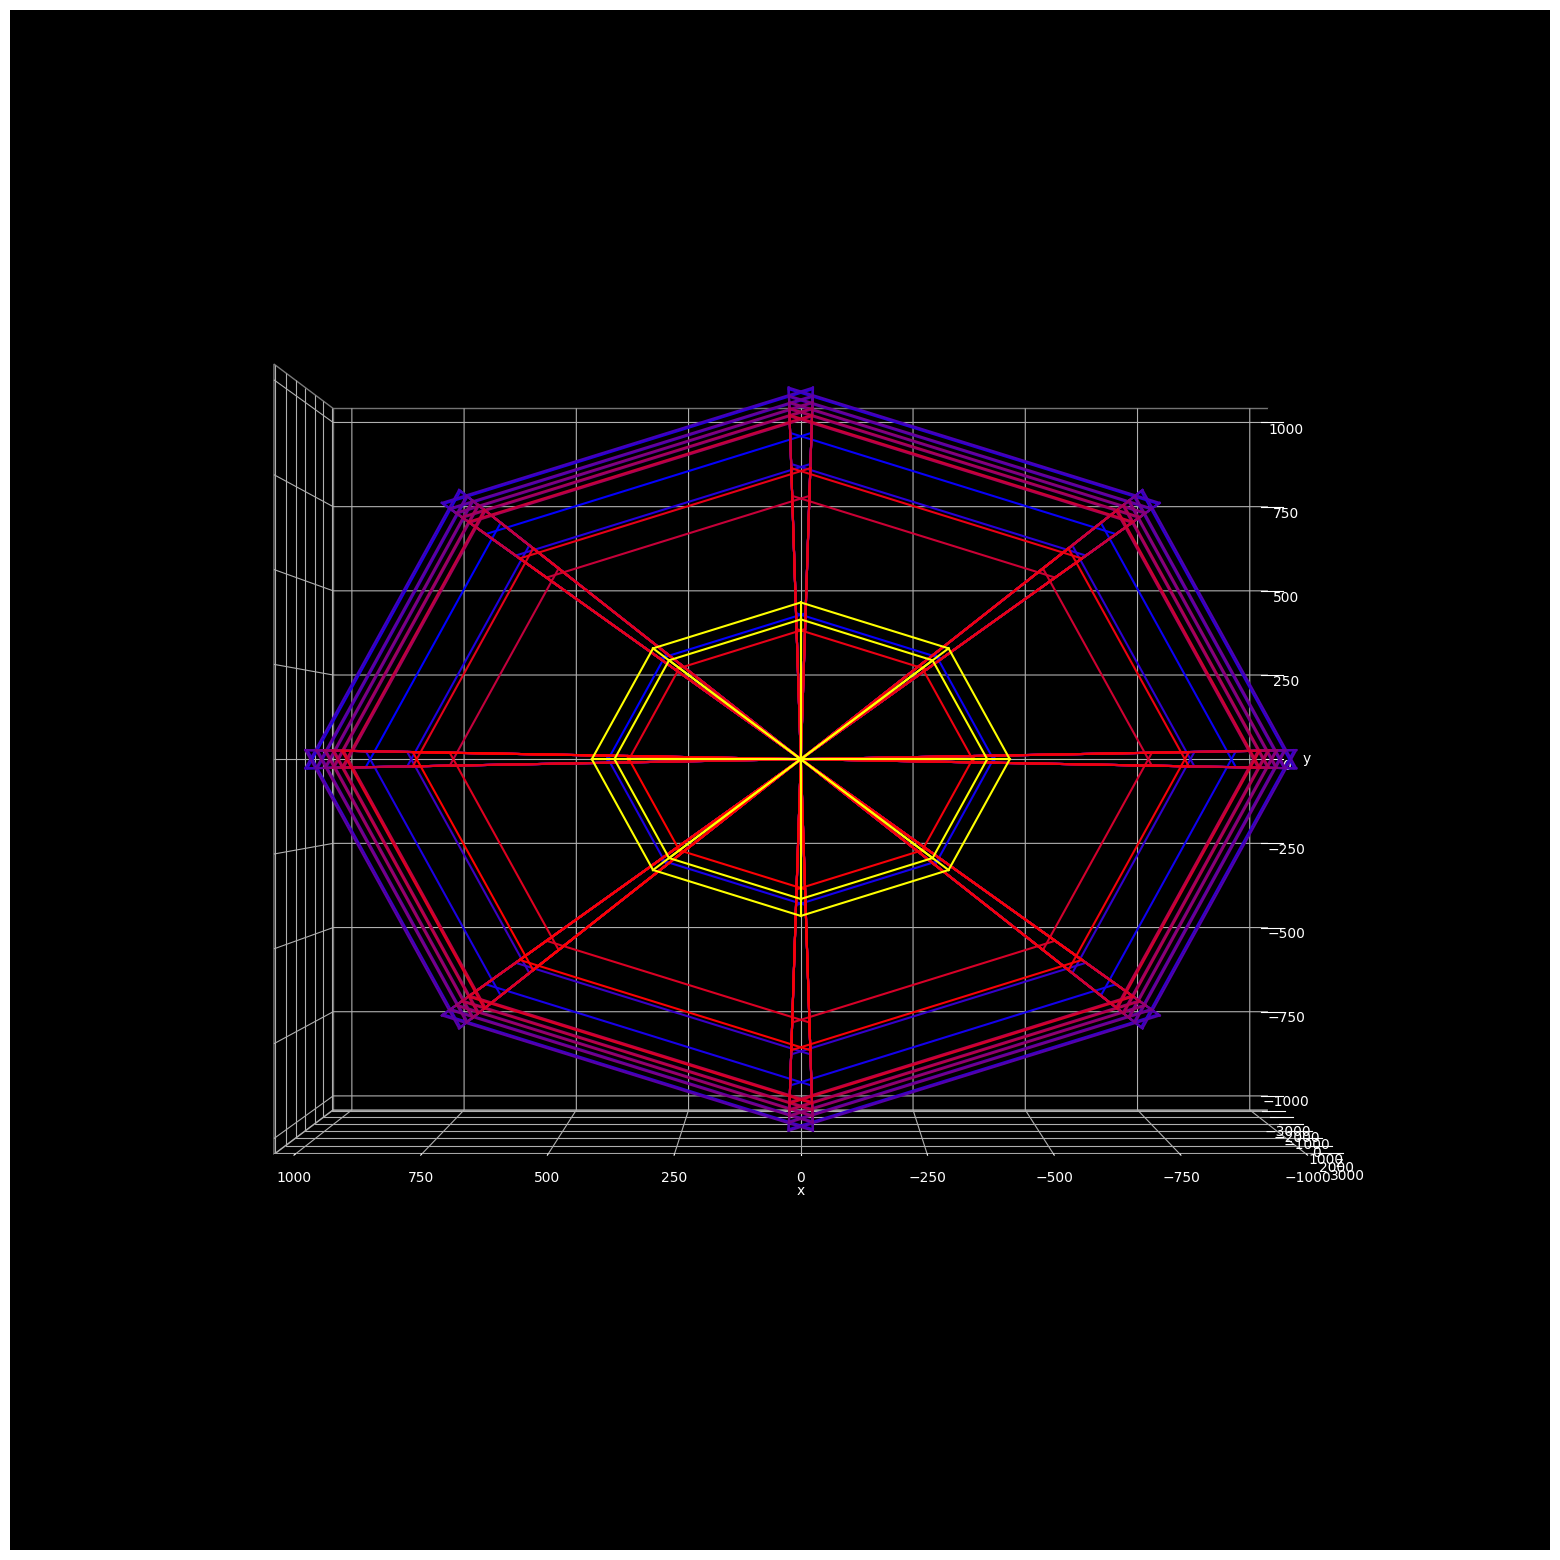

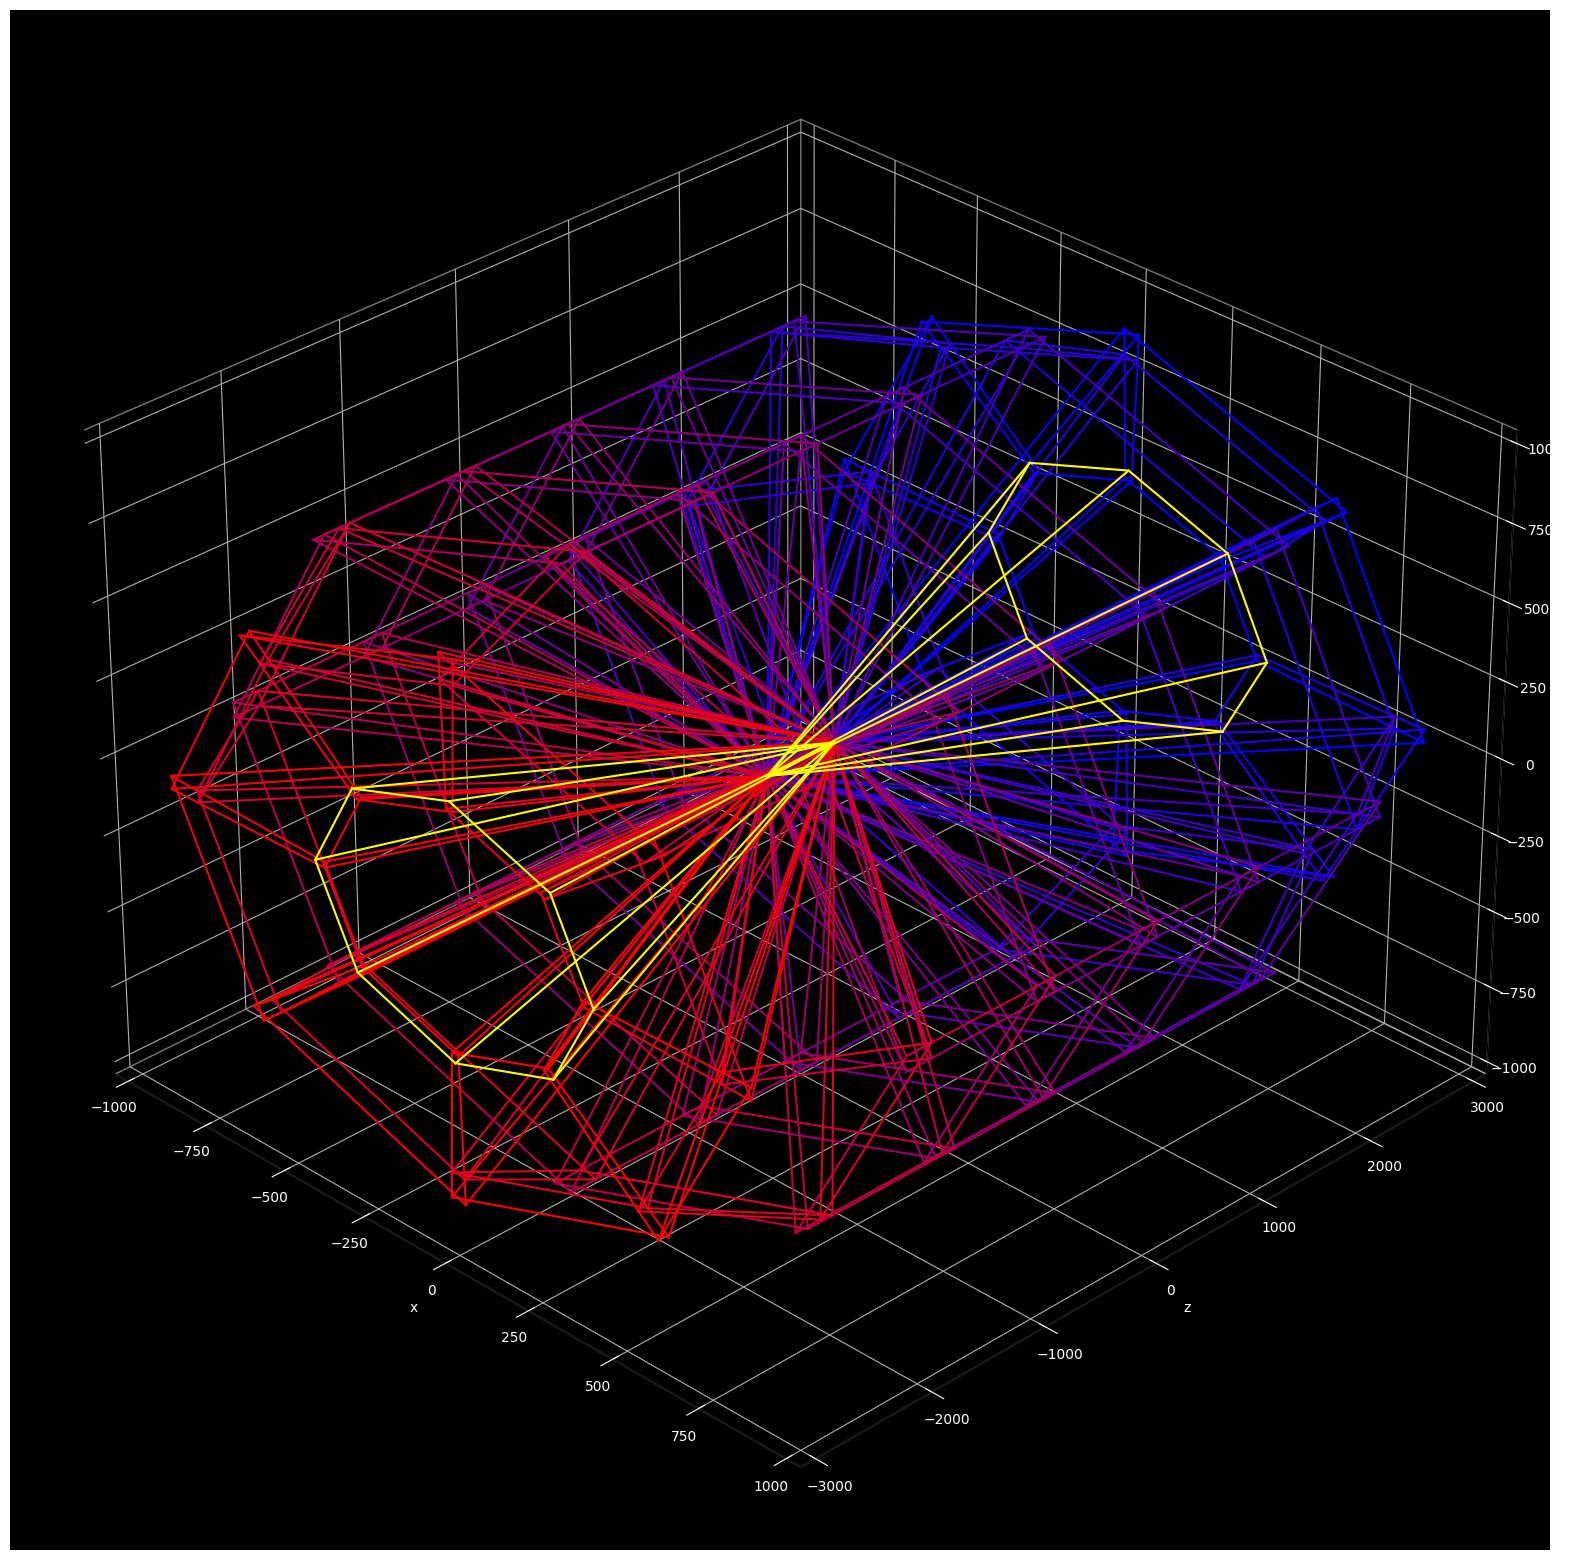

In [17]:
margin = 2 / 256 * math.pi
num_z_ranges = 8
num_x_ranges = 8
z_ranges = uniform_range_split(num_z_ranges, 0, 2 * math.pi, margin)
x_ranges = uniform_range_split(num_x_ranges, 8 / 64 * math.pi, 56 / 64 * math.pi, margin)


wedges = []
for x_range in x_ranges:
    for z_range in z_ranges:
        wedges.append(Wedge(z_range[0], z_range[1], x_range[0], x_range[1], 0.2))

pole_regions = []
pole_regions.append(PoleRegion(8 / 64 * math.pi, 0.2))
pole_regions.append(PoleRegion(56 / 64 * math.pi, 0.2))

figure, ax = get_3d_plot_figure(figure_size=(20, 20))
ax.view_init(elev=0, azim=0, roll=0)
for i in range(len(wedges)):
    red = (i / (len(wedges) - 1))
    blue = 1 - red
    plot_wedge_lines(figure, ax, wedges[i], color=(red, 0, blue))
for pole_region in pole_regions:
    plot_pole_region(figure, ax, pole_region, num_rays=num_z_ranges, color='yellow')

figure, ax = get_3d_plot_figure(figure_size=(20, 20))
ax.view_init(elev=0, azim=90, roll=0)
for i in range(len(wedges)):
    red = (i / (len(wedges) - 1))
    blue = 1 - red
    plot_wedge_lines(figure, ax, wedges[i], color=(red, 0, blue))
for pole_region in pole_regions:
    plot_pole_region(figure, ax, pole_region, num_rays=num_z_ranges, color='yellow')

figure, ax = get_3d_plot_figure(figure_size=(20, 20))
ax.view_init(elev=30, azim=-45, roll=0)
for i in range(len(wedges)):
    red = (i / (len(wedges) - 1))
    blue = 1 - red
    plot_wedge_lines(figure, ax, wedges[i], color=(red, 0, blue))
for pole_region in pole_regions:
    plot_pole_region(figure, ax, pole_region, num_rays=num_z_ranges, color='yellow')